### Task : Classification ( Logistic Regression -> Binary )
#### Input Features (Predictor Variables) : radius, texture, perimeter, area... (30)
#### Output (Response Variable(s)) : Class (0 or 1)

### Importing the necessary modules

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics, datasets, base, pipeline

### Collecting, Analyzing and Visualizing the data

In [30]:
data = datasets.load_breast_cancer()
print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [31]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [32]:
# Creating a data frame

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [34]:
# Checking for null values

any(df.isna().sum())

False

In [35]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [36]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [37]:
# Correlation Matrix (Pearson Correlation)

corr_matrix = df.iloc[:, :-1].corr()

corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [38]:
num_attr = df.columns[:-1]
num_attr_imp = ['mean perimeter', 'mean radius', 'worst area', 'worst perimeter']
target = df.columns[-1]

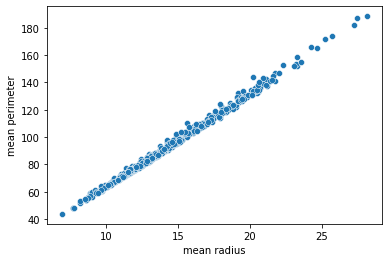

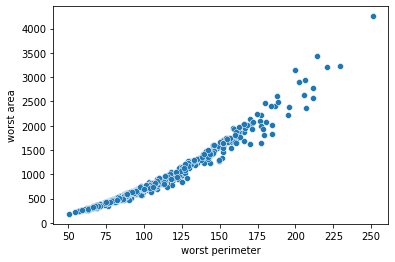

In [39]:
# Scatterplot

sns.scatterplot(x = 'mean radius', y = 'mean perimeter', data = df)
plt.show()

sns.scatterplot(x = 'worst perimeter', y = 'worst area', data = df)
plt.show()

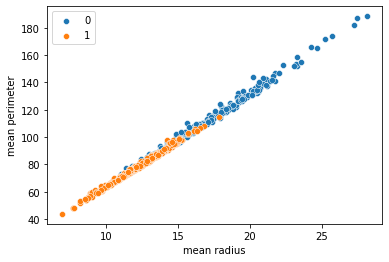

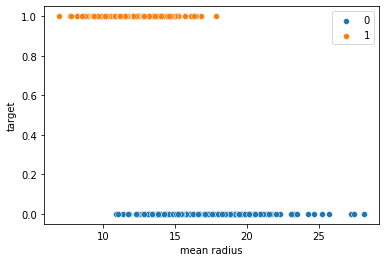

In [40]:
df0 = df[df[target] == 0]
df1 = df[df[target] == 1]

sns.scatterplot(x = 'mean radius', y = 'mean perimeter', data = df0, label = '0')
sns.scatterplot(x = 'mean radius', y = 'mean perimeter', data = df1, label = '1')
plt.legend()
plt.show()

sns.scatterplot(x = 'mean radius', y = target, data = df0, label = '0')
sns.scatterplot(x = 'mean radius', y = target, data = df1, label = '1')
plt.legend()
plt.show()

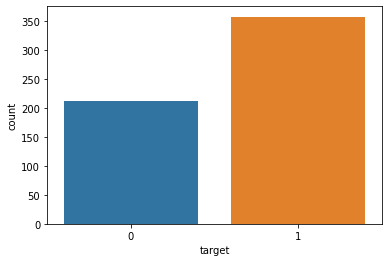

In [41]:
# Count Plot

sns.countplot(x = target, data = df)
plt.show()

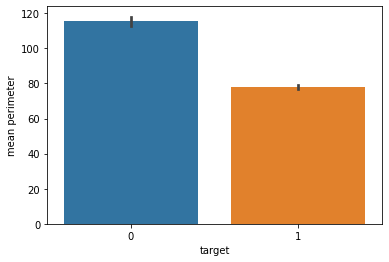

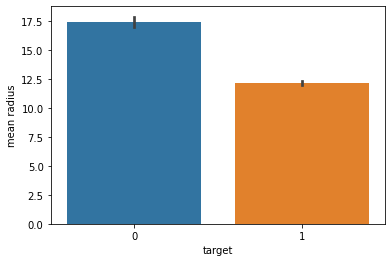

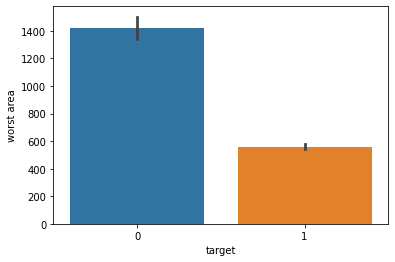

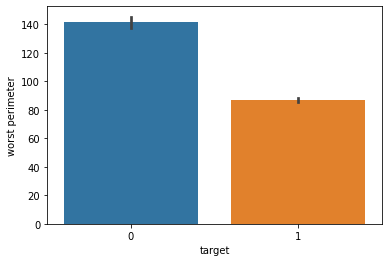

In [42]:
# Bar Chart

for var in num_attr_imp:
    sns.barplot(x = target, y = var, data = df)
    plt.show()

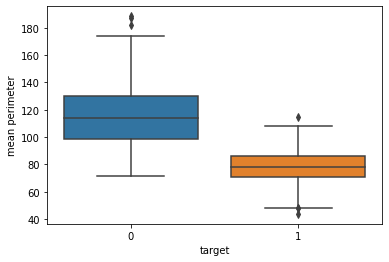

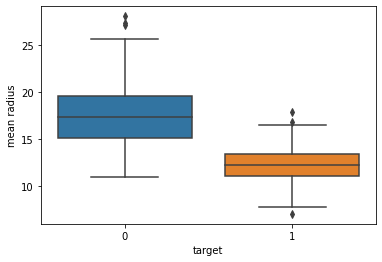

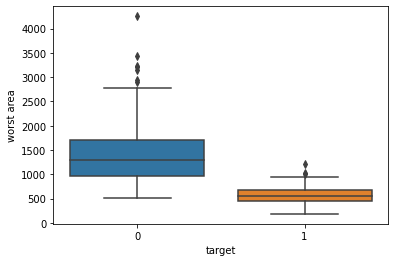

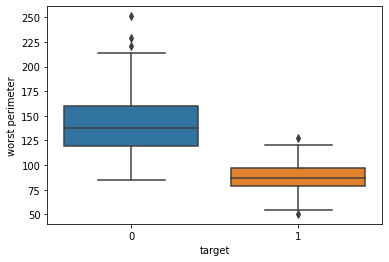

In [43]:
# Box Plot (Identifying the skewness)

for var in num_attr_imp:
    sns.boxplot(x = target, y = var, data = df)
    plt.show()

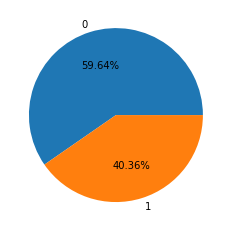

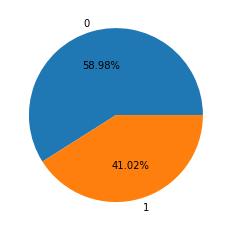

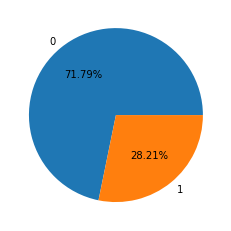

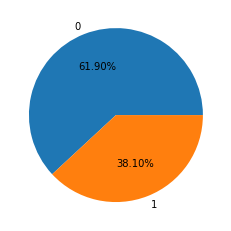

In [44]:
# Pie Chart

for var in num_attr_imp:
    plt.pie(x = df.groupby(target)[var].mean(), labels = np.unique(df[target]), autopct = "%.2f%%")
    plt.show()

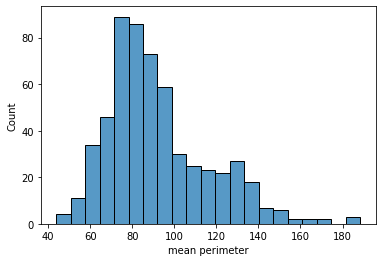

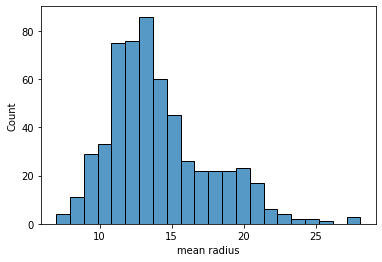

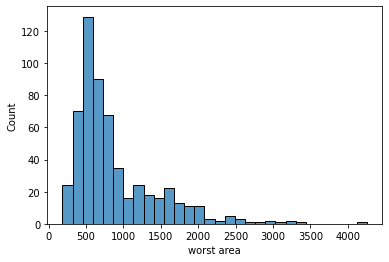

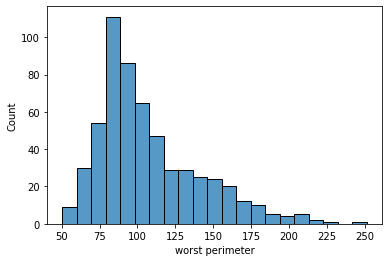

In [45]:
# Historgram

for var in num_attr_imp:
    sns.histplot(x = var, data = df)
    plt.show()

### Data Preprocessing and Preparation

In [46]:
p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
])

In [47]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(df, df[[target]]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

In [48]:
print(train_set.shape, test_set.shape)

(455, 31) (114, 31)


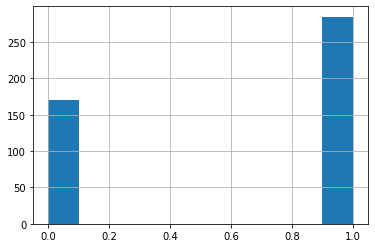

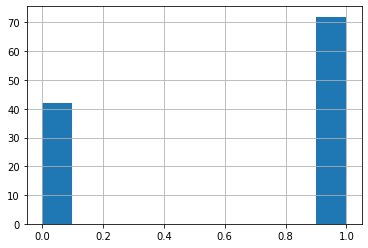

In [49]:
# Checking whether the samples are uniformely distributed

train_set['target'].hist()
plt.show()

test_set['target'].hist()
plt.show()

In [50]:
# Scaling the features

train_set_scaled = p.fit_transform(train_set.iloc[:, :-1])

train_set_scaled = np.c_[train_set_scaled, train_set.iloc[:, -1]]

In [51]:
X_train = train_set_scaled[:, :-1]
y_train = train_set_scaled[:, -1].astype(int)

### Training the Model and Evaluating it's Performance

In [52]:
# Implementing Logistic Regression from scratch using Batch Gradient Descent

class LogisticRegression:
    
    def __init__(self, max_iter = 10000, lr = 0.01):
        self.max_iter = max_iter
        self.lr = lr
        self.weights = self.bias = 0
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.max_iter):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            dw = (1 / n) * np.dot(X.T, y_pred - y)
            db = (1 / n) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_pred_prob = self.sigmoid(np.dot(X, self.weights) + self.bias)
        labels = (y_pred_prob > 0.5).astype(int)
        return labels
    
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc
            
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [53]:
# Training the classifier

lg = LogisticRegression()

lg.fit(X_train, y_train)

In [54]:
y_train_pred = lg.predict(X_train)

train_acc = np.sum(y_train == y_train_pred) / len(y_train)

print("Train Accuracy :", train_acc)

Train Accuracy : 0.989010989010989


#### Sklearn Implementation

In [55]:
model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

train_acc = model.score(X_train, y_train)

print("Train Accuracy :", train_acc)

Train Accuracy : 0.989010989010989


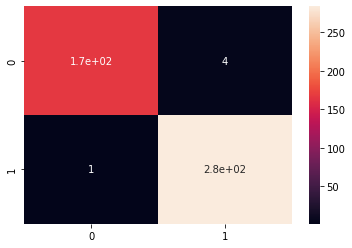

In [56]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [57]:
# Classification Metrics

tp, tn = conf_matrix[1][1], conf_matrix[0][0]
fp, fn = conf_matrix[0][1], conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9861111111111112
Recall or Sensitivity : 0.9964912280701754
F1 Score : 0.9912739965095986


In [58]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       170
           1       0.99      1.00      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



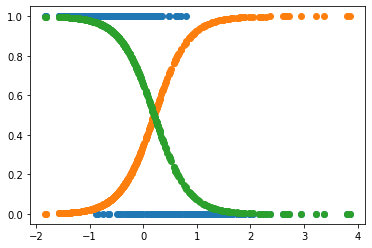

In [59]:
X_sub = X_train[:, 0].reshape(-1, 1)

m = linear_model.LogisticRegression()

m.fit(X_sub, y_train)

y_pred_prob = m.predict_proba(X_sub)

plt.scatter(X_sub, y_train)
plt.scatter(X_sub, y_pred_prob[:, 0])
plt.scatter(X_sub, y_pred_prob[:, 1])
plt.show()

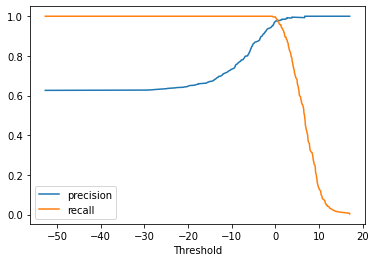

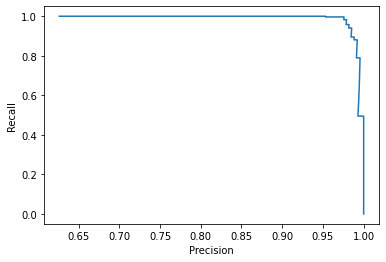

In [60]:
# Precision and Recall Curve

y_desc_scores = model_selection.cross_val_predict(linear_model.LogisticRegression(), X_train, y_train, cv = 10, method = 'decision_function')

precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, y_desc_scores)

plt.xlabel("Threshold")
plt.plot(thresholds, precisions[:-1], label = 'precision')
plt.plot(thresholds, recalls[:-1], label = 'recall')
plt.legend()
plt.show()

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(precisions, recalls)
plt.show()

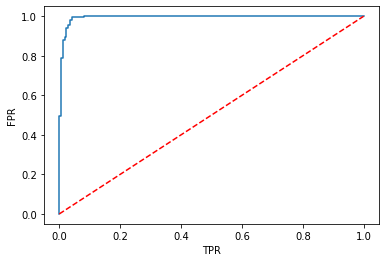

In [61]:
# Receiver Operator Characteristic Curve

tpr, fpr, thresholds = metrics.roc_curve(y_train, y_desc_scores)

plt.xlabel("TPR")
plt.ylabel("FPR")
plt.plot(tpr, fpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [62]:
# Area Under ROC Curve (AUC)

auc = metrics.roc_auc_score(y_train, y_desc_scores)
print("Area Under ROC Curve :", auc)

Area Under ROC Curve : 0.9936222910216718


### Validating the model

In [63]:
test_set_scaled = p.fit_transform(test_set.iloc[:, :-1])

test_set_scaled = np.c_[test_set_scaled, test_set.iloc[:, -1]]

In [64]:
X_test = test_set_scaled[:, :-1]
y_test = test_set_scaled[:, -1].astype(int)

In [65]:
y_test_pred = model.predict(X_test)

test_acc = model.score(X_test, y_test)

print("Test Accuracy :", test_acc)

Test Accuracy : 0.9736842105263158


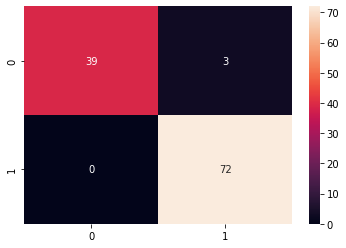

In [66]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [67]:
# Classification Metrics

tp, tn = conf_matrix[1][1], conf_matrix[0][0]
fp, fn = conf_matrix[0][1], conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.96
Recall or Sensitivity : 1.0
F1 Score : 0.9795918367346939


In [68]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       170
           1       0.99      1.00      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



#### Cross Validation

In [69]:
scores = model_selection.cross_val_score(base.clone(model), X_train, y_train, cv = 10)

print(np.sum(scores) / len(scores))

0.9824154589371981
